In [1]:
import requests
wzdoz = 'http://www.gutenberg.org/cache/epub/43936/pg43936.txt'
text = requests.get(wzdoz).text

oz = text.split("\r\n\r\n") # text.split('\n')

chapters = []
chapter_titles = []
for i,split in enumerate(oz):
    if split.find("Chapter ") != -1:
        chapter_titles.append(split)
        chapters.append(i)
    if split.find("*** END") != -1:
        chapter_titles.append(split)
        chapters.append(i)

chapter_content = []
for i,chapter in enumerate(chapters[0:len(chapters)-1]):
    chapter_content.append(oz[chapter:chapters[i+1]])

# Combined Chapter Segments (no gutenberg stuff)
chapter_segs = [' '.join(chapter) for chapter in chapter_content] 
# 
paragraphs = [line for line in chapter_content[0] if len(line) > 50]
all_paragraphs = [item for sublist in chapter_content for item in sublist if len(item) > 20]
import re
sentences = re.split('; |\.|\!|\?', ' '.join(all_paragraphs))

In [11]:
##  PIPELINE
url = 'http://www.gutenberg.org/cache/epub/43936/pg43936.txt'
text = load_text(url)
chapter_locations = find_chapters(text)
chapter_content = chapter_contents(text,chapter_locations)
chpt_15 = chapter_paragraph_built(15,chapter_content)
paragraphs = all_chapter_paragraphs(chapter_content)

In [20]:
clauses = clause_split(paragraphs)

In [22]:
grammar_clauses = grammar_pos(clauses)

In [41]:
y = [len(clause.split()) for clause in grammar_clauses]
x = np.arange(0,len(y))

In [40]:
grammar_clauses[0].split()

[u'NOUN',
 u'VERB',
 u'ADP',
 u'DET',
 u'NOUN',
 u'ADP',
 u'DET',
 u'ADJ',
 u'NOUN',
 u'NOUN']

In [48]:
import pandas as pd
gr_df = pd.DataFrame(grammar_clauses)

In [50]:
gr_df["len"] = gr_df[0].apply(lambda clause: len(clause.split()))


In [60]:
gr_df["phrase"] = clauses

In [ ]:
def entity_list(parsed_sentences):
    sentence_entities = [list(sentence.ents) for sentence in parsed_sentences]
    
    ents = list(parsedEx.ents)
    [' '.join([word for word in sentence.ents]) for sentence in sentences if sentence.ents]
ents = list(parsedEx.ents)
for entity in ents:
    print(entity.label, entity.label_, ' '.join(t.orth_ for t in entity))

In [55]:
gr_df

,0,len,phrase
0,NOUN VERB ADP DET NOUN ADP DET ADJ NOUN NOUN,10,"(Dorothy , lived , in , the , midst , of , the..."
1,ADP DET NOUN PART VERB NOUN VERB PART VERB VER...,14,"(for , the , lumber , to , build , it , had , ..."
2,CONJ DET NOUN VERB DET ADJ ADJ NOUN NOUN,9,"(and , this , room , contained , a , rusty , l..."
3,NOUN NOUN CONJ NOUN NOUN VERB DET ADJ NOUN ADP...,12,"(Uncle , Henry , and , Aunt , Em , had , a , b..."
4,ADV DET NOUN VERB VERB ADP NOUN NUM ADP DET AD...,13,"(where , the , family , could , go , in , case..."
5,ADV ADV PART VERB DET NOUN ADP ADJ NOUN,9,"(mighty , enough , to , crush , any , building..."
6,ADV NOUN VERB ADP DET NOUN CONJ VERB ADP,9,"(When , Dorothy , stood , in , the , doorway ,..."
7,NOUN VERB VERB NOUN ADP DET ADJ ADJ NOUN ADP D...,12,"(she , could , see , nothing , but , the , gre..."
8,ADV DET NOUN CONJ DET NOUN VERB DET ADJ NOUN A...,23,"(Not , a , tree , nor , a , house , broke , th..."
9,DET NOUN VERB VERB DET VERB NOUN ADP DET ADJ NOUN,11,"(The , sun , had , baked , the , plowed , land..."


(array([   1.,    4.,   36.,  110.,  210.,  230.,  217.,  163.,  120.,
         130.,   82.,   63.,   52.,   46.,   38.,   35.,   26.,   22.,
          21.,   17.,    5.,    6.,    5.,    2.,    2.,    5.,    4.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.]),
 array([  6.   ,   6.975,   7.95 ,   8.925,   9.9  ,  10.875,  11.85 ,
         12.825,  13.8  ,  14.775,  15.75 ,  16.725,  17.7  ,  18.675,
         19.65 ,  20.625,  21.6  ,  22.575,  23.55 ,  24.525,  25.5  ,
         26.475,  27.45 ,  28.425,  29.4  ,  30.375,  31.35 ,  32.325,
         33.3  ,  34.275,  35.25 ,  36.225,  37.2  ,  38.175,  39.15 ,
         40.125,  41.1  ,  42.075,  43.05 ,  44.025,  45.   ]),
 <a list of 40 Patch objects>)

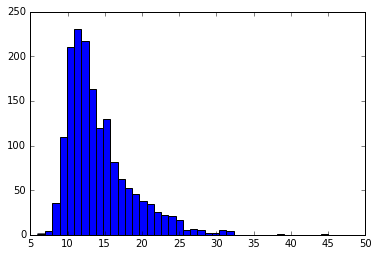

In [47]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y,bins=40)

In [32]:
x = np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
sentences = sentences_by_chapter(paragraphs)

In [13]:
grammar_sentences = grammar_pos(sentences)

In [23]:
parsed_sentences = chapter_parsed(sentences)

In [2]:
import requests

def load_text(url):
    text = requests.get(url).text
    text = text.split("\r\n\r\n") # text.split('\n')
    return text

def find_chapters(text):
    """input: raw text from request
    output: the location of the start of each chapter"""
    chapters = []
    chapter_titles = []
    for i,split in enumerate(text):
        if split.find("Chapter ") != -1:
            chapter_titles.append(split)
            chapters.append(i)
    #         print(split)
        if split.find("*** END") != -1:
            chapter_titles.append(split)
            chapters.append(i)
#             print(split)
    return chapters

def chapter_contents(text,chapters):
    """input: the text along with the location of the start of each chapter
    output: the list of chapter_contents (are they lists or strings?!)"""
    chapter_content = []
    for i,chapter in enumerate(chapters[0:len(chapters)-1]):
        chapter_content.append(text[chapter:chapters[i+1]])
    return chapter_content

## YO CHAPTER PARAGAPHS

In [3]:
def chapter_paragraph_built(chpt_num,chapter_content):
    """input: chpt_num - which chapter we want to look at
    output: the chapter list"""
    chpt = [paragraph.lstrip('\r\n').strip() for paragraph in chapter_content[chpt_num - 1] 
         if len(paragraph.lstrip('\r\n').strip()) > 40]
    chpt = [" ".join(phrase.split()) for phrase in chpt]
    chpt = [phrase.replace(" ,",",").replace(" 's","'s") for phrase in chpt]
    return chpt

In [4]:
def all_chapter_paragraphs(chapter_content):
    v = []
    for i in range(len(chapter_content)):
        chpt = [paragraph.lstrip('\r\n').strip() for paragraph in chapter_content[i]
                    if len(paragraph.lstrip('\r\n').strip()) > 40]
        chpt = [" ".join(phrase.split()) for phrase in chpt]
        chpt = [phrase.replace(" ,",",").replace(" 's","'s") for phrase in chpt]
        v = v + chpt
    return v

In [19]:
import re

def sentences_by_chapter(chapter):
    """
        Input: a chapter and whether we keep spoken or author written text
        Output: a list of phrases
    """
    sentences = re.split('; |\.|\!|\?', ' '.join(chapter))
    long_sentences = [sentence.strip().lstrip('_"]') for sentence in sentences if len(sentence) > 45]
    res = [parser(sentence) for sentence in long_sentences]
    return res

def clause_split(text_list):
    """
        Input: a list of sentences 
        Output: a list of parsed phrases
    """
    sentences = re.split('; |\.|\!|\?|,|-', ' '.join(text_list))
    long_sentences = [sentence.strip().lstrip('_"]') for sentence in sentences if len(sentence) > 45]
    res = [parser(sentence) for sentence in long_sentences]
    return res


def chapter_parsed_full(parsed_sentences):
    """Input: parsed_sentence..."""
    return [' '.join([word.orth_ for word in sentence]) 
                            for sentence in parsed_sentences]

def chapter_parsed(parsed_sentences, spoken=False):
    
    partofspeech_sentence = [' '.join([word.pos_ for word in sentence]) 
                             for sentence in parsed_sentences]
    if spoken == True:    
        
        lkz = [i for i,sentence in enumerate(partofspeech_sentence) 
           if sentence.find("PUNCT PUNCT") != -1]
        
        partofspeech = [parsed_sentences[i] for i in lkz]
        sentences = [' '.join([word.orth_ for word in parsed_sentences[i]]) for i in lkz]
    else:
        
        prgz = [i for i,sentence in enumerate(partofspeech_sentence) 
           if sentence.find("PUNCT PUNCT") == -1]
        
        partofspeech = [parsed_sentences[i] for i in prgz]
        sentences = [' '.join([word.orth_ for word in parsed_sentences[i]]) for i in prgz]

    return sentences

def partofspeech(token_phrase, partofspeech_list):
    """
        Input: a phrase and the parts of speech we want to collect from the phrase.
        Output: a shortened segment of phrase only containing those parts of speech. 
    """
    new_phrase = [' '.join([word.pos_ for word in token_phrase]) for token_phrase in token_phrases if word.pos_ in partofspeech_list]
    return new_phrase

def grammar_pos(parsed_sentences):
    grammar_sentences = [' '.join([word.pos_ for word in phrase]) for phrase in parsed_sentences]
    return grammar_sentences

In [6]:
stop = '/Users/ingrid/Desktop/yellp/opinion-lexicon-English/terrier-stop.txt'
x = open(stop)

In [7]:
stop_words = x.read().split('\n')

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re

In [9]:
# A custom stoplist
STOPLIST = set(stopwords.words('english') + ["n't", "'s", "'m", "ca","illustration", "chapter"] + list(ENGLISH_STOP_WORDS))
# List of symbols we don't care about
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-----", "---", "...", "“", "”", "'ve"]

In [10]:
from spacy.en import English
parser = English()

In [ ]:
# Similarity matrix of paragraphs using Word2Vec

In [11]:
def tokenizer(text):
    
    # get the tokens using spaCy
    tokens = parser(text)
#     print(tokens[0].orth_)
    # lemmatize
#     print(tokens[0].pos == 89)
#     tokens = [token for token in tokens if str(token.pos_) == "ADJ"]

#     print(tokens)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas

    # stoplist the tokens
    tokens = [tok for tok in tokens if tok not in STOPLIST]

    # stoplist symbols
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
#     print(tokens)
    # remove large strings of whitespace
    while "" in tokens:
        tokens.remove("")
    while " " in tokens:
        tokens.remove(" ")
    while "\n" in tokens:
        tokens.remove("\n")
    while "\n\n" in tokens:
        tokens.remove("\n\n")
    
#     tokens = parser(" ".join(tokens))
    
    return tokens


In [26]:
# Every step in a pipeline needs to be a "transformer". 
# Define a custom transformer to clean text using spaCy
class CleanTextTransformer(TransformerMixin):
    """
    Convert text to cleaned text
    """

    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
    
# A custom function to clean the text before sending it into the vectorizer
def cleanText(text):
    # get rid of newlines
    text = text.strip().replace("\n", " ").replace("\r", " ")

    # lowercase
    text = text.lower()

    return text

# A custom function to tokenize the text using spaCy
# and convert to lemmas
def tokenizeText(sample):
    
    # get the tokens using spaCy
    tokens = parser(sample)
#     print(tokens[0].orth_)
    # lemmatize
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas

    # stoplist the tokens
    tokens = [tok for tok in tokens if tok not in STOPLIST]

    # stoplist symbols
    tokens = [tok for tok in tokens if tok not in SYMBOLS]

    # remove large strings of whitespace
    while "" in tokens:
        tokens.remove("")
    while " " in tokens:
        tokens.remove(" ")
    while "\n" in tokens:
        tokens.remove("\n")
    while "\n\n" in tokens:
        tokens.remove("\n\n")

    return tokens

def printNMostInformative(vectorizer, clf, N):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
  

## TOPICS!

In [27]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck <L.J.Buitinck@uva.nl>
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 40

def store_top_ngrams(model, feature_names, n_top_words):
    ngram_topic_lists = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        ngram_topic_lists.append(topic_words)
    return ngram_topic_lists

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" : ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    

In [29]:
print("Loading dataset...")
t0 = time()

#talking_auth,partofspeech_auth,partofspeech_sentences, parsed_sentences,talking,partofspeech_talking


data_samples = grammar_clauses#all_paragraphs #chpt1_paragraphs#unspoken_parsed_1#parsed_sentences_str#chapter_content[3]#all_paragraphs#sentences #all_paragraphs #chapter_segs
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, #max_features=n_features,
                                   tokenizer=tokenizeText, 
                                   ngram_range=(5, 5),)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=4, max_features=n_features,
                                tokenizer=tokenizeText, 
                                ngram_range=(5, 5),)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features,"
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
# exit()
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

NMF_ngrams = store_top_ngrams(nmf, tfidf_feature_names, n_top_words)
print("Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)
LDA_ngrams = store_top_ngrams(nmf, tfidf_feature_names, n_top_words)


Loading dataset...
done in 0.000s.
Extracting tf-idf features for NMF...
done in 1.583s.
Extracting tf features for LDA...
done in 1.497s.
Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...
done in 0.146s.

Topics in NMF model:
Topic #0:
adp det noun adp det : det noun adp det noun : noun adp det noun adp : verb adp det noun adp : adj adp det noun adp : verb verb adp det noun : noun adp det noun verb : verb adj noun adp det : adj noun adp det noun : adv verb adj noun adp : noun adp det noun conj : adp det noun adp noun : det noun adp det adj : verb adj adp det noun : noun verb verb adp det : adv adp det noun adp : verb verb verb adp det : conj verb adp det noun : noun adp det noun noun : noun adp noun verb adp : adp adp det noun adp : noun verb verb verb adp : det verb adp det noun : adp det noun det noun : det noun verb det adj : adj noun adp noun verb : verb conj verb adp det : adv verb det adj noun : adp noun adp det noun : conj det noun verb verb : adv

/Users/ingrid/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:44: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [ ]:
from __future__ import print_function
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_topics = 10
n_top_words = 40

def store_top_ngrams(model, feature_names, n_top_words):
    ngram_topic_lists = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        ngram_topic_lists.append(topic_words)
    return ngram_topic_lists


#talking_auth,partofspeech_auth,partofspeech_sentences, parsed_sentences,talking,partofspeech_talking


data_samples = chpt1_paragraphs#unspoken_parsed_1#parsed_sentences_str#chapter_content[3]#all_paragraphs#sentences #all_paragraphs #chapter_segs

In [275]:
def topics(chapter, ngram_min=1, ngram_max=5,n_topics=10, n_top_words=20, tfidf=True):
    """Input: ngram_min - min gram val, ngram_max - max gram value, 
    chapter - the paragraph list from given chapter, 
    n_topics - the number of topics we want to search for in the text
    n_top_words - the number of words we want to allocate to each chapter
    tfidf options - do we want to model using NMF(using tfidf) or LDA(using tf)
    Output: ngram word lists
    
    *** Dependencies include tokenizeText!!"""
    if tfidf == True:
        # Use tf-idf features for NMF.
        tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, #max_features=n_features,
                                           tokenizer=tokenizeText, 
                                           ngram_range=(ngram_min, ngram_max),)

        tfidf = tfidf_vectorizer.fit_transform(data_samples)
        
        # Fit the NMF model
        nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

        tfidf_feature_names = tfidf_vectorizer.get_feature_names()
        ngrams = store_top_ngrams(nmf, tfidf_feature_names, n_top_words)

    else:
        # Use tf (raw term count) features for LDA.
        tf_vectorizer = CountVectorizer(max_df=0.95, min_df=4, max_features=n_features,
                                        tokenizer=tokenizeText, 
                                        ngram_range=(ngram_min, ngram_max),)
        tf = tf_vectorizer.fit_transform(data_samples)

        # Fit Latent Dirichlet Allocation
        lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                        learning_method='online', learning_offset=50.,
                                        random_state=0)
        lda.fit(tf)
        
        tf_feature_names = tf_vectorizer.get_feature_names()
        ngrams = store_top_ngrams(lda, tf_feature_names, n_top_words)
    return ngrams


In [290]:
ngrams = topics(chpt1_paragraphs)

In [267]:

from collections import defaultdict
import operator

def paragraph_topic(topic_set,chapter):
    """
        Input: list of words or ngrams in topic, list of text in chapter(split by paragraph)
        Output: indices of paragraphs that are now 'labeled with this topic
        Output: dictionary of term counts in each paragraph (to rank topics in each)
    """    
    d = defaultdict(int)
    for i,paragraph in enumerate(chapter):
        for topic in topic_set:
            if paragraph.find(topic) != -1:
                d[i] += 1 #* float(1/len(paragraph))
    return d


def label_paragraphs(d,count):
    """Input: 
        d: dictionary of topic count, 
        thresh: instead of using a count we can pick how many paragraphs rep topics. 
        count : number of paragraphs we'd like to label
       Output:
        list of paragraph indices
    """
    sorted_d = sorted(d.items(), key=operator.itemgetter(1))
    top = sorted_d[::-1][0:count]
    indices = [ind[0] for ind in top]
    return indices

def topic_lists(topics,chapter,count):
    """Input: 
        topics: list of topic lists
        chapter: chapter we are looking at
        topic_num: number of topics we want to label
        count: number of paragraphs we want to label with topic
    Output: topic_pgrf_indice - list of paragraphs for each topic"""
    topic_pgrf_indice = []
    for topic in topics: 
        d = paragraph_topic(topic,chapter)
        pgrf_set = label_paragraphs(d,count)
        topic_pgrf_indice.append(pgrf_set)
    return topic_pgrf_indice



In [284]:
paragraph_labels = topic_lists(NMF_ngrams,chapter_content[1],5)

In [342]:
paragraph_labels

[[13, 9, 22, 6, 28],
 [52, 42, 10, 65, 55],
 [51, 70, 39, 6, 68],
 [42, 17, 16, 70, 52],
 [30, 28, 11, 22, 51],
 [42, 34, 71, 70, 43],
 [37, 39, 30, 28, 6],
 [16, 6, 52, 42, 13],
 [17, 42, 16, 10, 65],
 [7, 5, 10, 6, 52]]

## KMEANS CLUSTERING

In [411]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

true_k = 5
TfidfVectorizer(max_df=0.95, min_df=2, #max_features=n_features,
                                   tokenizer=tokenizeText, 
                                   ngram_range=(1, 3))
X = vectorizer.fit_transform(chpt15_2)
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print( "Cluster %d:" % i)
    for ind in order_centroids[i, :4]:
        print( ' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 thought
 great
 come
 day
Cluster 1:
 heart
 luck
 knew
 morrow
Cluster 2:
 room
 oz
 throne
 discovery
Cluster 3:
 did
 met
 wish
 winged
Cluster 4:
 eyes
 green
 screen
 make


## SENTIMENT

In [102]:
import pandas as pd
vdf = pd.DataFrame(parsed_sentences)
pvdf = pd.DataFrame(paragraphs)

In [131]:
from vaderSentiment.vaderSentiment import sentiment as vaderSentiment
vdf["vader"] = vdf[0].apply(lambda sentence: vaderSentiment(sentence))
pvdf["vader"] = pvdf[0].apply(lambda paragraph: vaderSentiment(paragraph))


In [132]:
from textblob import TextBlob
vdf["txtblob"] = vdf[0].apply(lambda sentence: TextBlob(sentence).sentiment)
vdf["textblob_noun"] = vdf[0].apply(lambda sentence: TextBlob(sentence).noun_phrases) 

In [136]:
# vdf[vdf[0].apply(lambda line: line.find(" 's")) != -1 ]
# vdf[0] = vdf[0].apply(lambda line: line.replace(" 's","'s"))
y_polarity = vdf.txtblob.apply(lambda tpl: tpl[1])
# vdf

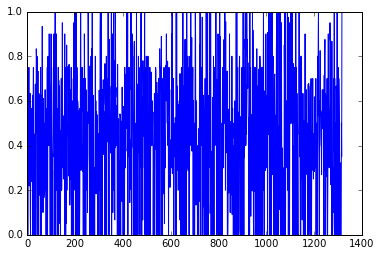

In [139]:
plt.plot(y_polarity.index,y_polarity)

In [105]:
vdf.shape

(1317, 2)

In [64]:
vdf.vader[0]

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.854, 'pos': 0.146}

In [96]:
## sentiment and which words are being modified... if they are proper nouns or not..


# how about tracking words that are + or - and then keep the highly repeated ones
vdf.vader[16].items()[0][1]
vdf[vdf.vader.apply(lambda line: line.items()[0][1]) > 0.5].head()
# vdf[vdf.vader.apply(lambda line: line.items()[2][1]) > 0.3]

,0,vader
161,Because you wear silver shoes and have killed ...,"{u'neg': 0.565, u'neu': 0.435, u'pos': 0.0, u'..."
353,and as he walked along he wept several tears o...,"{u'neg': 0.552, u'neu': 0.448, u'pos': 0.0, u'..."
413,Those creatures frightened me so badly that my...,"{u'neg': 0.508, u'neu': 0.492, u'pos': 0.0, u'..."
661,"and even if I wanted to , how could I kill the...","{u'neg': 0.57, u'neu': 0.43, u'pos': 0.0, u'co..."
675,But until she is dead I will not grant your wish,"{u'neg': 0.553, u'neu': 0.447, u'pos': 0.0, u'..."


In [110]:
y_neg = pvdf.vader.apply(lambda line: line.items()[0][1])
y_pos = pvdf.vader.apply(lambda line: line.items()[2][1])
y_compound = pvdf.vader.apply(lambda line: line.items()[3][1])
y_neutral = pvdf.vader.apply(lambda line: line.items()[1][1])
x = pvdf.index


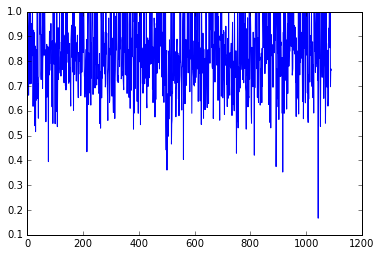

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y_neutral)

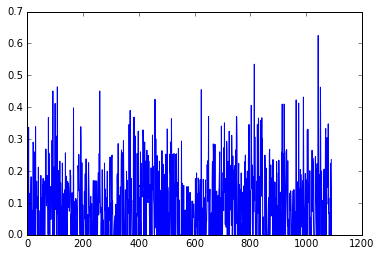

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y_pos)

In [77]:
vdf[0][16]

u"When Dorothy , who was an orphan , first came to her , Aunt Em had been so startled by the child 's laughter that she would scream and press her hand upon her heart whenever Dorothy 's merry voice reached her ears"

In [59]:
# Let's look at the named entities of this example:
example = u"Apple's stocks dropped dramatically after the death of Steve Jobs in October."
parsedEx = parser(example)
for token in parsedEx:
    print(token.orth_, token.ent_type_ if token.ent_type_ != "" else "(not an entity)")

print("-------------- entities only ---------------")
# if you just want the entities and nothing else, you can do access the parsed examples "ents" property like this:
ents = list(parsedEx.ents)
for entity in ents:
    print(entity.label, entity.label_, ' '.join(t.orth_ for t in entity))

Apple ORG
's (not an entity)
stocks (not an entity)
dropped (not an entity)
dramatically (not an entity)
after (not an entity)
the (not an entity)
death (not an entity)
of (not an entity)
Steve PERSON
Jobs PERSON
in (not an entity)
October DATE
. (not an entity)
-------------- entities only ---------------
349 ORG Apple
346 PERSON Steve Jobs
356 DATE October
